In [ ]:
"""
If you find this helpful, kindly cite this.

@article{KHAN2025107826,
title = {A comparative study of time–frequency features based spatio-temporal analysis with varying multiscale kernels for emotion recognition from EEG},
journal = {Biomedical Signal Processing and Control},
volume = {107},
pages = {107826},
year = {2025},
issn = {1746-8094},
doi = {https://doi.org/10.1016/j.bspc.2025.107826},
url = {https://www.sciencedirect.com/science/article/pii/S1746809425003374},
author = {Md Raihan Khan, Airin Akter Tania,  Mohiuddin Ahmad},
}


@INPROCEEDINGS{10499496,
  author={Khan, Md Raihan and Ahmad, Mohiuddin},
  booktitle={2024 International Conference on Advances in Computing, Communication, Electrical, and Smart Systems (iCACCESS)}, 
  title={Mental Stress Detection from EEG Signals Using Comparative Analysis of Random Forest and Recurrent Neural Network}, 
  year={2024},
  volume={},
  number={},
  pages={1-6},
  doi={10.1109/iCACCESS61735.2024.10499496}}"""


# Figure 1

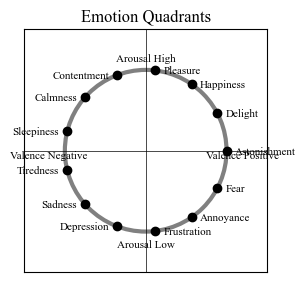

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and font style
plt.figure(figsize=(8/2.54, 8/2.54))
plt.rcParams["font.family"] = "Times New Roman"
radius = 1
head_circle = plt.Circle((0, 0), radius * 1.0, color='gray', fill=False, linewidth=3)
plt.gca().add_artist(head_circle)
# Draw the x and y axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add labels for the axes with improved positioning
plt.text(0, 1.15, 'Arousal High', ha='center', va='center', fontsize=8)
plt.text(0, -1.15, 'Arousal Low', ha='center', va='center', fontsize=8)
plt.text(1.2, -0.05, 'Valence Positive', ha='center', va='center', fontsize=8)  # Slightly above the axis
plt.text(-1.2, -0.05, 'Valence Negative', ha='center', va='center', fontsize=8)  # Slightly below the axis

# Emotion labels and corresponding angles (to position them on a circle)
emotions = ['Astonishment', 'Delight', 'Happiness', 'Pleasure', 'Contentment',
            'Calmness', 'Sleepiness', 'Tiredness', 'Sadness', 'Depression',
            'Frustration', 'Annoyance', 'Fear']

# Calculate angles for positioning points on a circle
angles = np.linspace(0, 2 * np.pi, len(emotions), endpoint=False)

# Set radius of the circle
radius = 1

# Plot emotions on the circle
for i, emotion in enumerate(emotions):
    x = radius * np.cos(angles[i])
    y = radius * np.sin(angles[i])
    
    # Plot the emotion point
    plt.plot(x, y, 'ko')  
    
    # Offset the label to make sure it's readable
    if x > 0:
        plt.text(x + 0.1, y, emotion, fontsize=8, ha='left', va='center')
    else:
        plt.text(x - 0.1, y, emotion, fontsize=8, ha='right', va='center')

# Set the limits to accommodate labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Hide ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.title('Emotion Quadrants', fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Figure 5

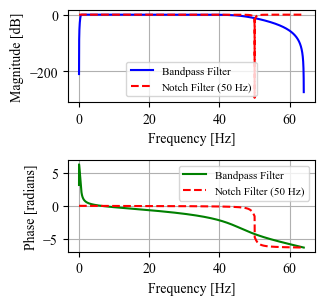

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, iirnotch

# Sampling frequency
fs = 128.0  # Hz

# Butterworth bandpass filter parameters
order = 4
lowcut = 0.5  # Lower cutoff frequency (Hz)
highcut = 45.0  # Higher cutoff frequency (Hz)

# Design Butterworth bandpass filter
b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Notch filter parameters (for powerline noise at 50 Hz)
notch_freq = 50.0  # Hz
quality_factor = 30  # Q-factor (higher = narrower notch)
b_notch, a_notch = iirnotch(notch_freq / (fs / 2), quality_factor)

# Compute the frequency response of both filters
w, h = freqz(b, a, worN=8000, fs=fs)  # Bandpass filter response
w_notch, h_notch = freqz(b_notch, a_notch, worN=8000, fs=fs)  # Notch filter response

# Set figure size to approximately 8.5 cm x 8 cm (3.35 x 3.15 inches)
fig, ax = plt.subplots(2, 1, figsize=(3.35, 3.15))

# Plot Butterworth Bandpass Filter Magnitude Response
ax[0].plot(w, 20 * np.log10(np.abs(h)), 'b', label='Bandpass Filter')
ax[0].plot(w_notch, 20 * np.log10(np.abs(h_notch)), 'r--', label='Notch Filter (50 Hz)')
ax[0].set_xlabel('Frequency [Hz]', fontsize=10, fontname='Times New Roman')
ax[0].set_ylabel('Magnitude [dB]', fontsize=10, fontname='Times New Roman')
ax[0].grid(True)
ax[0].legend(loc='best', fontsize=8)

# Plot Butterworth Bandpass Filter Phase Response
angles = np.unwrap(np.angle(h))
ax[1].plot(w, angles, 'g', label='Bandpass Filter')
ax[1].plot(w_notch, np.unwrap(np.angle(h_notch)), 'r--', label='Notch Filter (50 Hz)')
ax[1].set_xlabel('Frequency [Hz]', fontsize=10, fontname='Times New Roman')
ax[1].set_ylabel('Phase [radians]', fontsize=10, fontname='Times New Roman')
ax[1].grid(True)
ax[1].legend(loc='best', fontsize=8)

# Set global font to Times New Roman
plt.rc('font', family='Times New Roman', size=10)

# Adjust layout to make sure labels and titles fit well in the small figure size
plt.tight_layout()

# Save the figure as high-resolution PNG
#plt.savefig('butterworth_filter_response.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()


# Figure 6 (a)


Shape of EEG data: (1, 32, 8064)


C:\Users\kraih\AppData\Local\Temp\ipykernel_11180\4283558860.py:42: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


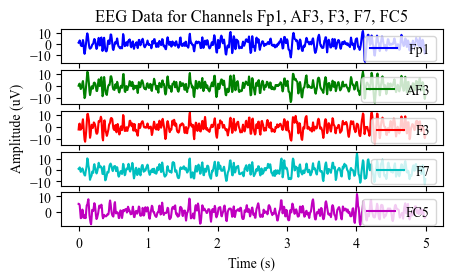

In [12]:
# import pickle
import numpy as np
import matplotlib.pyplot as plt

# File path and sampling rate
file_path = "s01.dat"
fs = 128

# Load the .dat file using pickle
with open(file_path, 'rb') as f:
    dat_file = pickle.load(f, encoding='latin1')

# Limiting the data to EEG channels (first 32 channels)
dat_file['data'] = dat_file['data'][:1, :32, :]
print("Shape of EEG data:", dat_file['data'].shape)

# Channel names for the first 5 channels
channels = ['Fp1', 'AF3', 'F3', 'F7', 'FC5']
colors = ['b', 'g', 'r', 'c', 'm']  # Colors for each plot

# Extracting the first trial data for the first 5 channels (5 seconds of data)
first_trial_data = dat_file['data'][0, :5, :5 * fs]  # First 5 channels, first 5 seconds
time_axis_5s = np.arange(5 * fs) / fs  # Time axis for 5 seconds

# Create a figure for plotting all 5 channels in one figure
plt.figure(figsize=(12.5 / 2.54, 1.30 / 2.54 * 5))  # Height increased to stack 5 plots

# Plot each channel in a separate subplot
for i in range(5):
    plt.subplot(5, 1, i + 1)  # 5 rows, 1 column, subplot i+1
    plt.plot(time_axis_5s, first_trial_data[i], label=f'{channels[i]}', color=colors[i])
    
    plt.legend(loc='upper right')
    if i == 4:  # Add x-label only to the last subplot
        plt.xlabel('Time (s)')
    if i == 2:
        plt.ylabel('Amplitude (uV)')
    if i == 0:  # Add title to the first subplot
        plt.title('EEG Data for Channels Fp1, AF3, F3, F7, FC5')

# Adjust layout to ensure plots do not overlap
plt.tight_layout()

# Save the combined figure as an image file
#plt.savefig('eeg_combined_plot.png', dpi=300)

# Show the plot
plt.show()


# Figure 6 (b)

Shape of EEG data: (1, 32, 8064)


C:\Users\kraih\AppData\Local\Temp\ipykernel_11180\767348008.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


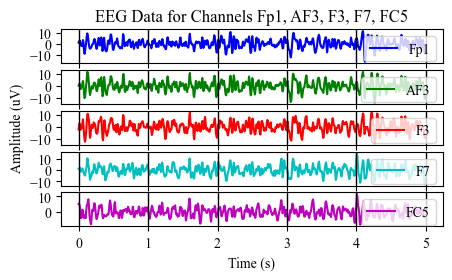

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# File path and sampling rate
file_path = "s01.dat"
fs = 128

# Load the .dat file using pickle
with open(file_path, 'rb') as f:
    dat_file = pickle.load(f, encoding='latin1')

# Limiting the data to EEG channels (first 32 channels)
dat_file['data'] = dat_file['data'][:1, :32, :]
print("Shape of EEG data:", dat_file['data'].shape)

# Channel names for the first 5 channels
channels = ['Fp1', 'AF3', 'F3', 'F7', 'FC5']
colors = ['b', 'g', 'r', 'c', 'm']  # Colors for each plot

# Extracting the first trial data for the first 5 channels (5 seconds of data)
first_trial_data = dat_file['data'][0, :5, :5 * fs]  # First 5 channels, first 5 seconds
time_axis_5s = np.arange(5 * fs) / fs  # Time axis for 5 seconds

# Create a figure for plotting all 5 channels in one figure
plt.figure(figsize=(12.5 / 2.54, 1.30 / 2.54 * 5))  # Height increased to stack 5 plots

# Plot each channel in a separate subplot
for i in range(5):
    plt.subplot(5, 1, i + 1)  # 5 rows, 1 column, subplot i+1
    plt.plot(time_axis_5s, first_trial_data[i], label=f'{channels[i]}', color=colors[i])
    
    # Add vertical yellow lines at each second (0, 1, 2, 3, 4, 5)
    for sec in range(6):
        plt.axvline(x=sec, color='k', linestyle='-', linewidth=1)
    
    plt.legend(loc='upper right')
    if i == 4:  # Add x-label only to the last subplot
        plt.xlabel('Time (s)')
    if i == 2:
        plt.ylabel('Amplitude (uV)')
    if i == 0:  # Add title to the first subplot
        plt.title('EEG Data for Channels Fp1, AF3, F3, F7, FC5')

# Adjust layout to ensure plots do not overlap
plt.tight_layout()

# Save the combined figure as an image file
#plt.savefig('eeg_combined_plot_with_segments.png', dpi=300)

# Show the plot
plt.show()


# Figure 7 (a)

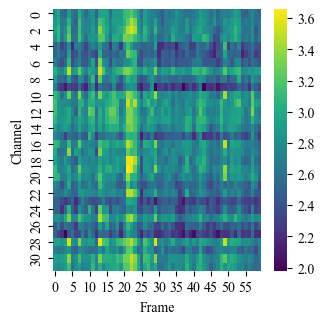

In [36]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load .dat files
def load_dat_file(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')  # Use latin1 to handle any encoding issues
    return data

# Parameters
Participant = 1  # Participant 1
Video = 1  # Video 1
Channel = 32  # EEG channels
Fs = 128  # Sampling frequency
frameNum = 60  # Number of frames

# Load participant 1 data (s01.dat)
data_path = 'data_preprocessed_python_FULL'
myfilename = f's0{Participant}.dat'
participant_data = load_dat_file(os.path.join(data_path, myfilename))

# Extract data for the first video (video 1)
data = participant_data['data']
video_data = data[Video-1, :, :]  # Video 1, all channels

# Prepare to calculate Differential Entropy (DE)
datastart = 128 * 3
datalength = 8064 - 128 * 3
data_segments = video_data[:, datastart:datastart + datalength]

# Initialize differential entropy matrix
de_matrix = np.zeros((Channel, frameNum))

# Compute Differential Entropy (DE) for each channel
for channel in range(Channel):
    data1 = data_segments[channel, :]  # Data for this channel
    
    frameSize = datalength // frameNum
    start = 0
    
    # Split into frames and compute differential entropy for each frame
    for k in range(frameNum):
        end_frame = start + frameSize
        frame_data = data1[start:end_frame]
        
        # Compute variance for the frame
        variance = np.var(frame_data)
        
        # Calculate differential entropy
        de_value = 0.5 * np.log(2 * np.pi * np.e * variance)
        de_matrix[channel, k] = de_value
        
        start = end_frame

# Plot the Differential Entropy (DE) for the first frame (channel 1)
plt.figure(figsize=(8.5/2.54, 8.5/2.54))
#plt.title('Differential Entropy (DE) for Subject 1, Trial 1, All Channels')
sns.heatmap(de_matrix, cmap='viridis', cbar=True, annot=False)
plt.xlabel('Frame', font='Times New Roman')
plt.ylabel('Channel', font='Times New Roman')
plt.tight_layout()
#plt.savefig("DE FEATURE.png")
plt.show()


# Figure 7 (b) 

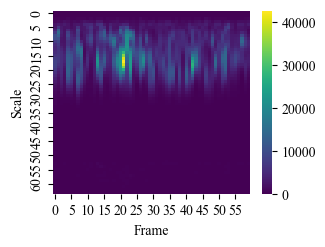

In [37]:
import numpy as np
import os
import pickle
import pywt
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load .dat files
def load_dat_file(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')  # Use latin1 to handle any encoding issues
    return data

# Parameters
Participant = 1  # Participant 1
Video = 1  # Video 1
Channel = 32  # EEG channels
Fs = 128  # Sampling frequency
frameNum = 60  # Number of frames
totalScale = 64  # Number of scales in CWT
wname = 'morl'  # Morlet wavelet

# Load participant 1 data (s01.dat)
data_path = 'data_preprocessed_python_FULL'
myfilename = f's0{Participant}.dat'
participant_data = load_dat_file(os.path.join(data_path, myfilename))

# Extract data for the first video (video 1)
data = participant_data['data']
video_data = data[Video-1, :, :]  # Video 1, all channels

# Prepare to calculate Wavelet Energy (WE)
datastart = 128 * 3
datalength = 8064 - 128 * 3
data_segments = video_data[:, datastart:datastart + datalength]

# Initialize wavelet energy matrix
we_matrix = np.zeros((Channel, totalScale, frameNum))

# Compute Wavelet Energy (WE) for each channel
for channel in range(Channel):
    data1 = data_segments[channel, :]  # Data for this channel
    
    # Compute Continuous Wavelet Transform (CWT)
    f = np.arange(1, totalScale + 1)
    f = Fs / totalScale * f
    wcf = pywt.central_frequency(wname)
    scal = Fs * wcf / f
    coefs, freqs = pywt.cwt(data1, scales=np.arange(1, totalScale + 1), wavelet=wname)
    
    # Compute wavelet scalogram (energy density)
    sc = np.abs(coefs)**2
    
    frameSize = datalength // frameNum
    start = 0
    
    # Split into frames and compute energy
    for k in range(frameNum):
        end_frame = start + frameSize
        we_matrix[channel, :, k] = np.sum(sc[:, start:end_frame], axis=1)  # Sum over the time axis for energy
        start = end_frame

# Plot the Wavelet Energy (WE) for one of the frames (e.g., frame 1, channel 1)
plt.figure(figsize=(8.5/2.54, 6.54/2.54))
#plt.title('Wavelet Energy (WE) for Frame 1, Channel 1 - Subject 1, Trial 1')
sns.heatmap(we_matrix[0, :, :], cmap='viridis', cbar=True, annot=False)
plt.xlabel('Frame', font='Times New Roman')
plt.ylabel('Scale', font='Times New Roman')
plt.tight_layout()
#plt.savefig("WE FEATURE.png")
plt.show()


# Figure 7 (c)

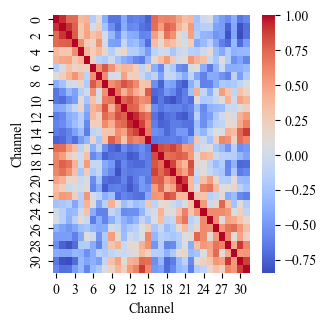

In [38]:
import numpy as np
import os
import pickle
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load .dat file
def load_dat_file(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')  # Use latin1 to handle any encoding issues
    return data

# Parameters
Participant = 1  # Participant 1
Video = 1  # Video 1
Channel = 32  # EEG channels
Fs = 128  # Sampling frequency
frameNum = 60  # Number of frames

# Load participant 1 data (s01.dat)
data_path = 'data_preprocessed_python_FULL'
myfilename = f's0{Participant}.dat'
participant_data = load_dat_file(os.path.join(data_path, myfilename))

# Extract data for the first video (video 1)
data = participant_data['data']
video_data = data[Video-1, :, :]  # Video 1, all channels

# Prepare to calculate XCOR
datastart = 128 * 3
datalength = 8064 - 128 * 3
data_segments = video_data[:, datastart:datastart + datalength]

# Compute cross-correlation (XCOR) for each frame
frameSize = datalength // frameNum
xcor_matrix = np.zeros((Channel, Channel, frameNum))

start = 0
for k in range(frameNum):
    end_frame = start + frameSize
    if end_frame > datalength:
        end_frame = datalength
    
    # Extract data for the current frame
    frame_data = data_segments[:, start:end_frame].T  # Transpose to get samples x channels
    
    # Compute cross-correlation for each pair of channels
    for ch1 in range(Channel):
        for ch2 in range(Channel):
            corr_value, _ = pearsonr(frame_data[:, ch1], frame_data[:, ch2])  # Pearson correlation coefficient
            xcor_matrix[ch1, ch2, k] = corr_value
    
    start = end_frame

# Plot the XCOR matrix for one of the frames (e.g., frame 1)
plt.figure(figsize=(8.5/2.54, 8.54/2.54))
sns.heatmap(xcor_matrix[:, :, 0], cmap='coolwarm', annot=False, cbar=True)
#plt.title('Cross-Correlation (XCOR) for Frame 1 - Subject 1, Trial 1')
plt.xlabel('Channel', font='Times New Roman')
plt.ylabel('Channel', font='Times New Roman')
plt.tight_layout()
#plt.savefig("XCOR FEATURE.png")
plt.show()


# Figure 7 (d)

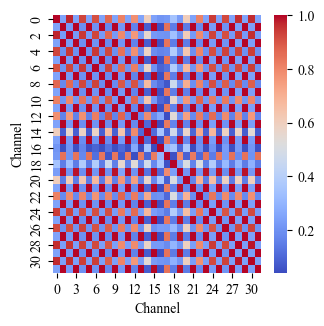

In [39]:
import numpy as np
import os
import pickle
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load .dat file
def load_dat_file(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')  # Use latin1 to handle any encoding issues
    return data

# Parameters
Participant = 1  # Participant 1
Video = 1  # Video 1
Channel = 32  # EEG channels
Fs = 128  # Sampling frequency
frameNum = 60  # Number of frames

# Load participant 1 data (s01.dat)
data_path = 'data_preprocessed_python_FULL'
myfilename = f's0{Participant}.dat'
participant_data = load_dat_file(os.path.join(data_path, myfilename))

# Extract data for the first video (video 1)
data = participant_data['data']
video_data = data[Video-1, :, :]  # Video 1, all channels

# Prepare to calculate PLV
datastart = 128 * 3
datalength = 8064 - 128 * 3
data_segments = video_data[:, datastart:datastart + datalength]

# Hilbert transform to extract phase information
phases = np.angle(hilbert(data_segments.T))

# Compute PLV for each frame
frameSize = datalength // frameNum
plv_matrix = np.zeros((Channel, Channel, frameNum))

start = 0
for k in range(frameNum):
    end_frame = start + frameSize
    phase_frame = phases[start:end_frame, :]
    N = phase_frame.shape[0]  # Number of time samples in this frame
    
    # Compute PLV between each pair of channels
    for ch1 in range(Channel):
        for ch2 in range(Channel):
            phase_diff = phase_frame[:, ch1] - phase_frame[:, ch2]
            plv_value = np.abs(np.sum(np.exp(1j * phase_diff)) / N)
            plv_matrix[ch1, ch2, k] = plv_value
    
    start = end_frame

# Plot the PLV matrix for one of the frames (e.g., frame 0)
plt.figure(figsize=(8.5/2.54, 8.54/2.54))
sns.heatmap(plv_matrix[:, :, 0], cmap='coolwarm', annot=False, cbar=True)
#plt.title('Phase Locking Value (PLV) for Frame 1 - Subject 1, Trial 1')
plt.xlabel('Channel', font='Times New Roman')
plt.ylabel('Channel', font='Times New Roman')
plt.tight_layout()
#plt.savefig("PLV FEATURE.png")
plt.show()


# Figure 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

frameNum = 60  # Number of frames

# Function to load data for a given feature type (e.g., DE, WE, PLV, XCOR)
def load_feature_data(feature, frameNum):
    dfs = []
    for i in range(1, 33):
        for j in range(1, 41):
            filename = f'All Features _ deap-research/{feature}/participant{i}video{j}.txt'
            cols = [i for i in range(frameNum)]
            df = pd.read_csv(filename, header=None, usecols=cols, delimiter=',')
            dfs.append(df.values)
    return np.array(dfs)

# Load data for the four features
dfs_DE = load_feature_data('DE', frameNum)
dfs_WE = load_feature_data('Wavelet_Energy', frameNum)
dfs_PLV = load_feature_data('PLV', frameNum)
dfs_XCOR = load_feature_data('XCOR', frameNum)

# Figure 8(a)

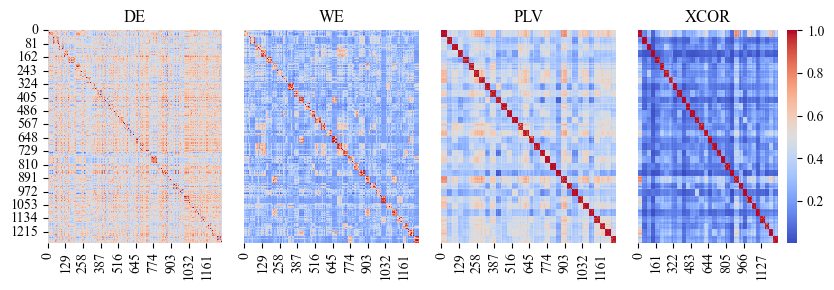

In [41]:
# Function to calculate the correlation matrix for a feature
def compute_correlation_matrix(dfs):
    mean_across_frames = np.mean(dfs, axis=2)  # Mean across frames
    return np.corrcoef(mean_across_frames)

# Compute correlation matrices for each feature
corr_matrix_DE = compute_correlation_matrix(dfs_DE)
corr_matrix_WE = compute_correlation_matrix(dfs_WE)
corr_matrix_PLV = compute_correlation_matrix(dfs_PLV)
corr_matrix_XCOR = compute_correlation_matrix(dfs_XCOR)

# Plot correlation matrices in a 2x2 subplot layout
plt.figure(figsize=(8.5, 3))  # Adjust the overall figure size

# Subplot for DE
plt.subplot(1, 4, 1)
sns.heatmap(corr_matrix_DE, annot=False, cmap='coolwarm', cbar=False)
plt.title('DE')
#plt.xticks([])
#plt.yticks([])

# Subplot for WE
plt.subplot(1, 4, 2)
sns.heatmap(corr_matrix_WE, annot=False, cmap='coolwarm', cbar=False)
plt.title('WE')
#plt.xticks([])
plt.yticks([])

# Subplot for PLV
plt.subplot(1, 4, 3)
sns.heatmap(corr_matrix_PLV, annot=False, cmap='coolwarm', cbar=False)
plt.title('PLV')
#plt.xticks([])
plt.yticks([])

# Subplot for XCOR
plt.subplot(1, 4, 4)
sns.heatmap(corr_matrix_XCOR, annot=False, cmap='coolwarm')
plt.title('XCOR')
#plt.xticks([])
plt.yticks([])

# Set the layout to ensure proper spacing
plt.tight_layout()

# Save the figure with the specified size for each subplot (4cm x 4cm)
#plt.savefig('correlation_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 8(b)

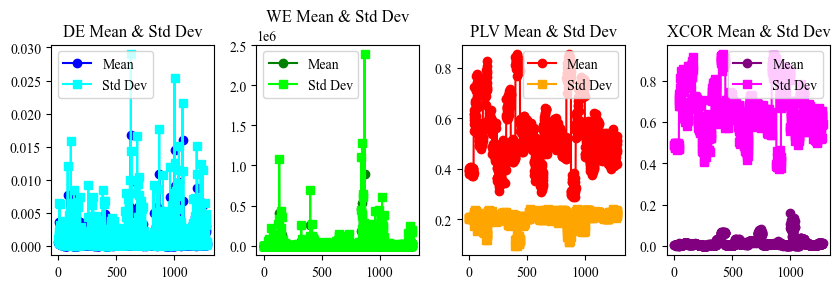

In [42]:
def compute_mean_std(dfs):
    mean_vals = np.mean(dfs, axis=(1, 2))  # Mean across all frames and participants
    std_vals = np.std(dfs, axis=(1, 2))    # Std deviation across all frames and participants
    return mean_vals, std_vals

# Compute mean and std for each feature
mean_DE, std_DE = compute_mean_std(dfs_DE)
mean_WE, std_WE = compute_mean_std(dfs_WE)
mean_PLV, std_PLV = compute_mean_std(dfs_PLV)
mean_XCOR, std_XCOR = compute_mean_std(dfs_XCOR)

# Create 1x4 subplots for mean and standard deviation
fig, axes = plt.subplots(1, 4, figsize=(8.5, 3))  # 4 plots in 1 row, adjust figure size

# Plot DE mean and std
axes[0].plot(mean_DE, 'o-', color='blue', label='Mean')
axes[0].plot(std_DE, 's-', color='cyan', label='Std Dev')
axes[0].set_title('DE Mean & Std Dev')
axes[0].legend()

# Plot WE mean and std
axes[1].plot(mean_WE, 'o-', color='green', label='Mean')
axes[1].plot(std_WE, 's-', color='lime', label='Std Dev')
axes[1].set_title('WE Mean & Std Dev')
axes[1].legend()

# Plot PLV mean and std
axes[2].plot(mean_PLV, 'o-', color='red', label='Mean')
axes[2].plot(std_PLV, 's-', color='orange', label='Std Dev')
axes[2].set_title('PLV Mean & Std Dev')
axes[2].legend()

# Plot XCOR mean and std
axes[3].plot(mean_XCOR, 'o-', color='purple', label='Mean')
axes[3].plot(std_XCOR, 's-', color='magenta', label='Std Dev')
axes[3].set_title('XCOR Mean & Std Dev')
axes[3].legend()

# Set the layout to ensure proper spacing
plt.tight_layout()

# Save the figure with the specified size for each subplot (4cm x 4cm)
#plt.savefig('mean_std_plots_1row.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 8(c)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

frameNum = 60  # Number of frames
num_participants = 32
num_videos = 40
sample_size = 100000  # Downsample to 100K values to avoid memory overload

# Function to load data for a given feature type in chunks
def load_feature_data(feature, frameNum):
    for i in range(1, num_participants + 1):
        for j in range(1, num_videos + 1):
            filename = f'All Features _ deap-research/{feature}/participant{i}video{j}.txt'
            cols = list(range(frameNum))
            df = pd.read_csv(filename, header=None, usecols=cols, delimiter=',', dtype=np.float32)
            yield df.values.flatten()

# Function to process data in chunks and save to disk
def process_and_save_feature(feature):
    flat_data = []
    
    for data in load_feature_data(feature, frameNum):
        flat_data.extend(data)  # Append new chunk to list

        # If list grows too large, save to disk in batches
        if len(flat_data) > 10_000_000:
            np.save(f'{feature}_temp.npy', np.array(flat_data, dtype=np.float32))
            flat_data = []  # Reset list to free memory

    # Convert to NumPy array and save final result
    flat_data = np.array(flat_data, dtype=np.float32)
    np.save(f'flat_{feature}.npy', flat_data)
    print(f"{feature} data saved with shape {flat_data.shape}")

# Process and save each feature
process_and_save_feature('DE')
process_and_save_feature('Wavelet_Energy')
process_and_save_feature('PLV')
process_and_save_feature('XCOR')

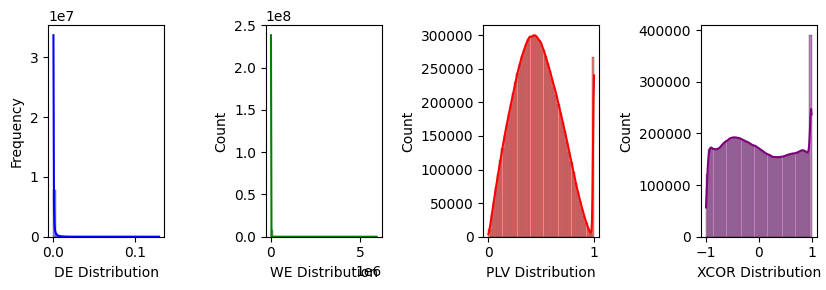

In [4]:


# Load data from saved files using memory-mapped mode
flat_DE = np.load('flat_DE.npy', mmap_mode='r')
flat_WE = np.load('flat_Wavelet_Energy.npy', mmap_mode='r')
flat_PLV = np.load('flat_PLV.npy', mmap_mode='r')
flat_XCOR = np.load('flat_XCOR.npy', mmap_mode='r')


# Plot distributions
plt.figure(figsize=(8.5, 3))

# Calculate bins dynamically
bins_DE = np.linspace(flat_DE.min(), flat_DE.max(), 50)
bins_WE = np.linspace(flat_WE.min(), flat_WE.max(), 50)
bins_PLV = np.linspace(flat_PLV.min(), flat_PLV.max(), 50)
bins_XCOR = np.linspace(flat_XCOR.min(), flat_XCOR.max(), 50)

# Subplot for DE
plt.subplot(1, 4, 1)
sns.histplot(flat_DE, bins=bins_DE, color='blue', kde=True)
plt.xlabel('DE Distribution')
plt.ylabel('Frequency')

# Subplot for WE
plt.subplot(1, 4, 2)
sns.histplot(flat_WE, bins=bins_WE, color='green', kde=True)
plt.xlabel('WE Distribution')

# Subplot for PLV
plt.subplot(1, 4, 3)
sns.histplot(flat_PLV, bins=bins_PLV, color='red', kde=True)
plt.xlabel('PLV Distribution')

# Subplot for XCOR
plt.subplot(1, 4, 4)
sns.histplot(flat_XCOR, bins=bins_XCOR, color='purple', kde=True)
plt.xlabel('XCOR Distribution')

plt.tight_layout()
plt.show()


# Figure 9

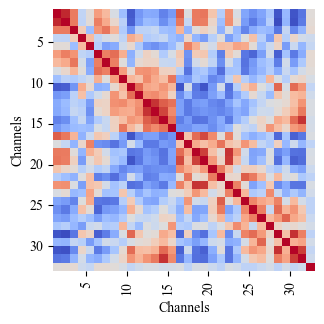

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate random EEG data for 32 channels
num_channels = 32
num_timepoints = 1000
file_path = "s01.dat"
fs = 128

# Load the .dat file using pickle
with open(file_path, 'rb') as f:
    dat_file = pickle.load(f, encoding='latin1')
# Random data for 32 channels (you can replace this with actual EEG data)
eeg_data = dat_file['data'][8:9, 1:num_channels+1, num_channels:2*num_timepoints][0]

# Compute the correlation matrix (Pearson correlation)
corr_matrix = np.corrcoef(eeg_data)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8.5 / 2.54, 8.5 / 2.54))  # Convert to cm
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=False, square=True,
            xticklabels=np.arange(5, num_channels+1, 5),
            yticklabels=np.arange(5, num_channels+1, 5))

# Set the tick labels (e.g., 5, 10, 15, etc.)
plt.xticks(np.arange(4, num_channels, 5), np.arange(5, num_channels+1, 5))
plt.yticks(np.arange(4, num_channels, 5), np.arange(5, num_channels+1, 5))

#plt.title("Correlation Matrix of Randomly Selected 32 Channels")
plt.xlabel('Channels')
plt.ylabel('Channels')

plt.tight_layout()
#plt.savefig('Spatial.png', dpi=300)
plt.show()


# Figure 10 

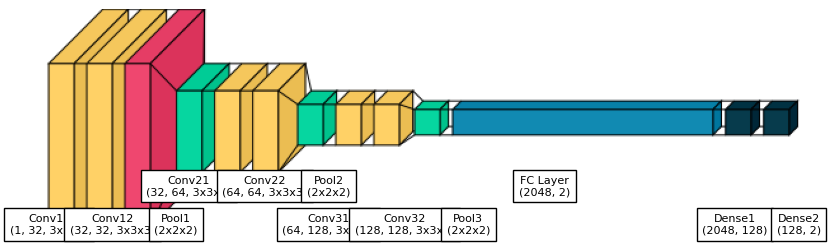

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import visualkeras
from PIL import ImageFont

# Define the model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=(32, 32, 3, 1)),
    layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same'),
    layers.Dropout(0.5),
    layers.MaxPooling3D(pool_size=(2, 2, 2), padding='same'),

    # Second Convolutional Block
    layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    layers.MaxPooling3D(pool_size=(2, 2, 2), padding='same'),

    # Third Convolutional Block
    layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    layers.MaxPooling3D(pool_size=(2, 2, 2), padding='same'),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output for 2 classes
])

# Visualize the model
image = visualkeras.layered_view(model)  # Display the model architecture

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL.Image as Image

# Load the image
#image_path = "model body.png"
#image = Image.open(image_path)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(image)
ax.axis("off")

# Define layer texts and positions (aligned below structure)
layer_texts = [
    ("Conv11\n(1, 32, 3x3x3)", (10, 160)),
    ("Conv12\n(32, 32, 3x3x3)", (60, 160)),
    ("Pool1\n(2x2x2)", (110, 160)),

    ("Conv21\n(32, 64, 3x3x3)", (120, 130)),
    ("Conv22\n(64, 64, 3x3x3)", (180, 130)),
    ("Pool2\n(2x2x2)", (230, 130)),

    ("Conv31\n(64, 128, 3x3x3)", (230, 160)),
    ("Conv32\n(128, 128, 3x3x3)", (290, 160)),
    ("Pool3\n(2x2x2)", (340, 160)),
    
    ("FC Layer\n(2048, 2)", (400, 130)),
    
    ("Dense1\n(2048, 128)", (550, 160)),
    ("Dense2\n(128, 2)", (600, 160))
]

# Add text annotations below the structure
for text, (x, y) in layer_texts:
    ax.text(x, y, text, fontsize=8, color="black", ha="center", va="top", bbox=dict(facecolor='white', alpha=1.0, edgecolor='black'))

# Save the updated image
annotated_image_path = "model_body_annotated_image.png"
#plt.savefig(annotated_image_path, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()

# Return the path to the annotated image
#annotated_image_path


# Figure 11 (a)

In [15]:
import torch
import pandas as pd
import numpy as np

# Parameters
frameNum = 60
depth = 3  # Should match the training data structure
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load the entire model
loaded_model = torch.load("cnn_classifier_wavelet_energy_arousal_full_3.pth")
loaded_model.eval()  # Set model to evaluation mode
print("Full model loaded and ready for inference.")

# Load the model
loaded_model = torch.load("cnn_classifier_wavelet_energy_arousal_full_3.pth")
loaded_model.eval()
print("Model loaded successfully.")

# Load the new data
filename = 'All Features _ deap-research/Wavelet_Energy/participant1video11.txt'
cols = [i for i in range(frameNum)]
df = pd.read_csv(filename, header=None, usecols=cols, delimiter=',')
dfs = [df.values]  # Assuming this file has a structure like your training dataset

# Convert to numpy array
dfs = np.array(dfs)
print(f"New data shape (raw): {dfs.shape}")

# Normalize the data (use min-max scaling, similar to training)
x_min = dfs.min(axis=(1, 2), keepdims=True)
x_max = dfs.max(axis=(1, 2), keepdims=True)
dfs_normal = (dfs - x_min) / (x_max - x_min)
print(f"New data shape (normalized): {dfs_normal.shape}")

# Reshape the data to match the CNN input format
reshape_dfs = np.split(dfs_normal, frameNum // depth, axis=2)  # Divide into depth slices
reshape_dfs = np.array(reshape_dfs)
reshape_dfs = np.reshape(reshape_dfs, [-1, 32, 32, depth])  # Example shape adjustment
print(f"New data shape (reshaped): {reshape_dfs.shape}")

# Convert to PyTorch tensor
data_tensor = torch.from_numpy(reshape_dfs).float().unsqueeze(1)  # Add channel dimension
data_tensor = data_tensor.to(device)

# Make predictions
with torch.no_grad():
    predictions = loaded_model(data_tensor)
    predicted_classes = torch.argmax(predictions, dim=1).cpu().numpy()

# Output predictions
print(f"Predicted classes: {predicted_classes}")


Full model loaded and ready for inference.
Model loaded successfully.
New data shape (raw): (1, 1024, 60)
New data shape (normalized): (1, 1024, 60)
New data shape (reshaped): (20, 32, 32, 3)
Predicted classes: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


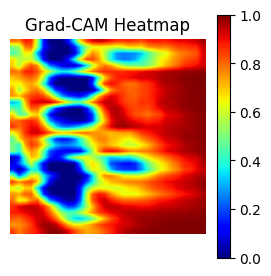

In [17]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define Grad-CAM function
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook for gradients
        self.target_layer.register_full_backward_hook(self.save_gradients)
        # Hook for activations
        self.target_layer.register_forward_hook(self.save_activations)

    def save_gradients(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def save_activations(self, module, input, output):
        self.activations = output

    def generate(self, input_tensor, class_index):
        # Forward pass
        output = self.model(input_tensor)
        # Zero grads
        self.model.zero_grad()

        # Backward pass for the specific class
        class_score = output[:, class_index].sum()
        class_score.backward()

        # Compute Grad-CAM
        weights = self.gradients.mean(dim=(2, 3, 4), keepdim=True)  # Global average pooling over depth, height, and width
        cam = torch.sum(weights * self.activations, dim=1).squeeze(0)  # Weighted sum of activations
        cam = torch.clamp(cam, min=0).detach().cpu().numpy()  # ReLU (clamp values >= 0)

        # Normalize the CAM
        cam = (cam - cam.min()) / (cam.max() - cam.min())
        return cam

# Instantiate Grad-CAM for your model
target_layer = loaded_model.conv11  # Replace with the layer of interest
grad_cam = GradCAM(loaded_model, target_layer)

# Pass a single sample (e.g., the first one) for Grad-CAM
input_sample = data_tensor[0].unsqueeze(0)  # Single input sample
predicted_class = predicted_classes[0]  # Class for the first input

# Generate CAM for the predicted class
cam = grad_cam.generate(input_sample, predicted_class)
# Aggregate the third dimension (depth) to reduce cam to 2D
cam_2d = np.mean(cam, axis=-1)  # Average across the last dimension
# Normalize the 2D CAM
cam_2d = (cam_2d - cam_2d.min()) / (cam_2d.max() - cam_2d.min())

# Visualize Grad-CAM heatmap
plt.figure(figsize=(8/2.54, 8/2.54))
plt.imshow(cam_2d, cmap='jet', interpolation='bilinear')
plt.colorbar()
plt.title(f"Grad-CAM Heatmap")
plt.axis('off')
#plt.savefig('grad_cam_heatmap.png')
plt.show()



# Figure 11 (b)

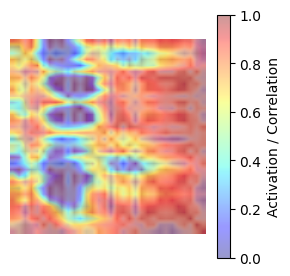

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Compute the correlation matrix (assuming 32x32 reshaped input)
input_data = reshape_dfs[0, :, :, 0]  # Take the first input's first depth slice
correlation_matrix = np.corrcoef(input_data)

# Normalize correlation matrix for visualization
correlation_matrix = (correlation_matrix - correlation_matrix.min()) / (correlation_matrix.max() - correlation_matrix.min())

# Step 2: Resize the Grad-CAM heatmap to match the input correlation matrix size
from skimage.transform import resize

resized_cam = resize(cam_2d, correlation_matrix.shape, mode='reflect', anti_aliasing=True)

# Step 3: Overlay the heatmap on the correlation matrix
plt.figure(figsize=(8/2.54, 8/2.54))

# Plot the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm', alpha=0.6, interpolation='bilinear')  # Base layer

# Overlay the heatmap
plt.imshow(resized_cam, cmap='jet', alpha=0.4, interpolation='bilinear')  # Heatmap layer

# Add a color bar and title
plt.colorbar(label="Activation / Correlation")

plt.axis('off')

# Save and show the plot
#plt.savefig("correlation_with_heatmap.png")
plt.show()

# Figure 12 (a) DE

In [46]:
DE_arousal_kernel_3 = {
    "Fold 6": {
        "loss": [    ],
        "train_acc": [     ],
        "test_acc": [       ],
        "running_time": [    ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}

# Creating a dictionary for the DE arousal kernel 5 based on the provided data
DE_arousal_kernel_5 = {
    "Fold 0": {
        "loss": [],
        "train_acc": [],
        "test_acc": [],
        "running_time": [] ,
        
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}

DE_valence_kernel_3 = {
    "Fold 6": {
        "loss": [],
        "train_acc": [],
        "test_acc": [],
        "running_time": [],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}
DE_valence_kernel_5 = {
    "Fold 3": {
        "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}
DE_valence_kernel_7 = {
    "Fold 0": {
"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}

DE_arousal_kernel_7 = {
    "Fold 1": {"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
              
              }
}


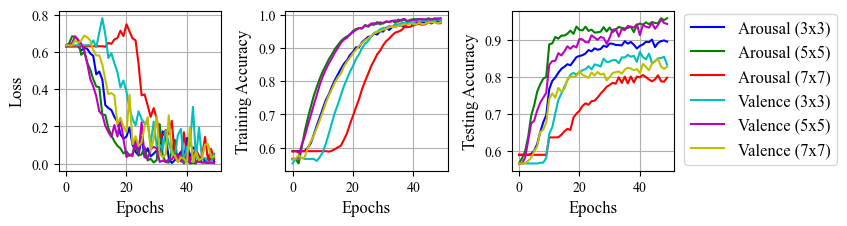

Last test acc values for each dictionary:
Arousal (3x3): 0.89564076
Arousal (5x5): 0.95934348
Arousal (7x7): 0.79818696
Valence (3x3): 0.83320272
Valence (5x5): 0.9437342400000002
Valence (7x7): 0.82771848
Last Train Acc values for each dictionary:
Arousal (3x3): 0.980382
Arousal (5x5): 0.987066
Arousal (7x7): 0.974523
Valence (3x3): 0.983073
Valence (5x5): 0.989757
Valence (7x7): 0.977214


In [44]:
import matplotlib.pyplot as plt

data_dicts = [
    DE_arousal_kernel_3["Fold 6"],
    DE_arousal_kernel_5["Fold 0"],
    DE_arousal_kernel_7["Fold 1"],
    DE_valence_kernel_3["Fold 6"],
    DE_valence_kernel_5["Fold 3"],
    DE_valence_kernel_7["Fold 0"]
]

# Legends for the plots
legend_names = [     "Arousal (3x3)", "Arousal (5x5)", "Arousal (7x7)",      "Valence (3x3)", "Valence (5x5)", "Valence (7x7)"]
#legend_names = [    "A (3x3)", "A (5x5)", "A (7x7)",    "V (3x3)", "V (5x5)", "V (7x7)"]
# Define colors for the 6 curves
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Set up figure size (18 cm width, 5 cm height for each subplot)
fig, ax = plt.subplots(1, 3, figsize=(18/2.54, 6/2.54))
fontsize_=12


    
# Plot Loss vs Epoch
for i, data in enumerate(data_dicts):
    ax[0].plot(data["epochs"], data["loss"], color=colors[i], label=legend_names[i])
ax[0].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[0].set_ylabel("Loss", fontname='Times New Roman', fontsize=fontsize_)
ax[0].grid(True)

# Plot Training Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[1].plot(data["epochs"], data["train_acc"], color=colors[i], label=legend_names[i])
ax[1].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[1].set_ylabel("Training Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[1].grid(True)

# Plot Testing Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[2].plot(data["epochs"], data["test_acc"], color=colors[i], label=legend_names[i])
ax[2].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[2].set_ylabel("Testing Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[2].grid(True)

# Position the legend outside the right side of the plots
fig.legend(legend_names, loc='center right', bbox_to_anchor=(1.2, 0.6), fontsize=fontsize_)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.98, 1])

# Set Times New Roman font for all text in the figure
plt.rc('font', family='Times New Roman')
#plt.savefig('DE_Final_result_plot2.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()



# Print the last test_acc for each dictionary
print("Last test acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['test_acc'][-1]}")

    
# Print the last test_acc for each dictionary
print("Last Train Acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['train_acc'][-1]}")


# Figure 12 (b) WE

In [50]:
WE_valence_kernel_3 = {
    "Best Fold": 3,
    "Fold 3": {
        "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}

WE_arousal_kernel_3 = {
    "Best Fold": 6,
    "Fold 6": {
"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}


WE_valence_kernel_5 = {
    "Best Fold": 6,
    "Fold 6": {
"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}


WE_arousal_kernel_5 = {
    "Best Fold": 3,
    "Fold 3": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}




WE_valence_kernel_7 = {
    "Fold 0": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}



WE_arousal_kernel_7 = {
    "Fold 5": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}




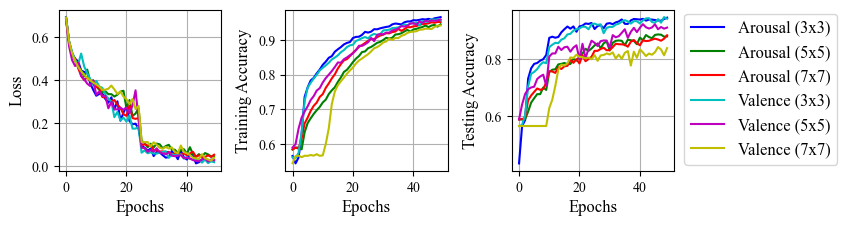

Last test_acc values for each dictionary:
Arousal (3x3): 0.94571928
Arousal (5x5): 0.87988268
Arousal (7x7): 0.88402304
Valence (3x3): 0.9419923200000001
Valence (5x5): 0.9109375000000001
Valence (7x7): 0.8388903600000001
Last test_acc values for each dictionary:
Arousal (3x3): 0.967057
Arousal (5x5): 0.946181
Arousal (7x7): 0.953038
Valence (3x3): 0.957856
Valence (5x5): 0.9602
Valence (7x7): 0.942795


In [49]:
import matplotlib.pyplot as plt
import numpy as np
data_dicts = [
    
    WE_arousal_kernel_3["Fold 6"],
    WE_arousal_kernel_5["Fold 3"],
    WE_arousal_kernel_7["Fold 5"],
    WE_valence_kernel_3["Fold 3"],
    WE_valence_kernel_5["Fold 6"],
    WE_valence_kernel_7["Fold 0"]
]

# Legends for the plots
legend_names = [
    "Arousal (3x3)", "Arousal (5x5)", "Arousal (7x7)",
"Valence (3x3)", "Valence (5x5)", "Valence (7x7)"
]

# Define colors for the 6 curves
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Set up figure size (18 cm width, 5 cm height for each subplot)
fig, ax = plt.subplots(1, 3, figsize=(18/2.54, 6/2.54))
fontsize_=12

# Plot Loss vs Epoch
for i, data in enumerate(data_dicts):
    ax[0].plot(data["epochs"], data["loss"], color=colors[i], label=legend_names[i])
ax[0].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[0].set_ylabel("Loss", fontname='Times New Roman', fontsize=fontsize_)
ax[0].grid(True)

# Plot Training Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[1].plot(data["epochs"], data["train_acc"], color=colors[i], label=legend_names[i])
ax[1].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[1].set_ylabel("Training Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[1].grid(True)

# Plot Testing Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[2].plot(data["epochs"], data["test_acc"], color=colors[i], label=legend_names[i])
ax[2].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[2].set_ylabel("Testing Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[2].grid(True)

# Position the legend outside the right side of the plots
fig.legend(legend_names, loc='center right', bbox_to_anchor=(1.2, 0.6), fontsize=fontsize_)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.98, 1])

# Set Times New Roman font for all text in the figure
plt.rc('font', family='Times New Roman')
#plt.savefig('WE_final_plot.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['test_acc'][-1]}")
    
print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['train_acc'][-1]}")

#  Figure 12 (c) PLV

In [54]:
PLV_arousal_kernel_3 = {
    "Best Fold": 8,
    "Fold 8": {
   "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}


PLV_valence_kernel_3 = {
    "Best Fold": 3,
    "Fold 3": {"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}



PLV_valence_kernel_5= {
    "Fold": 9,
        "Fold 9": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}


PLV_Arousal_Kernel_5 = {
     "Fold 8": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}

PLV_Arousal_Kernel_7 = {
    "Fold 5": {
"loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}



PLV_Valence_Kernel_7 = {
    "fold": 5,
     "Fold 5": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}





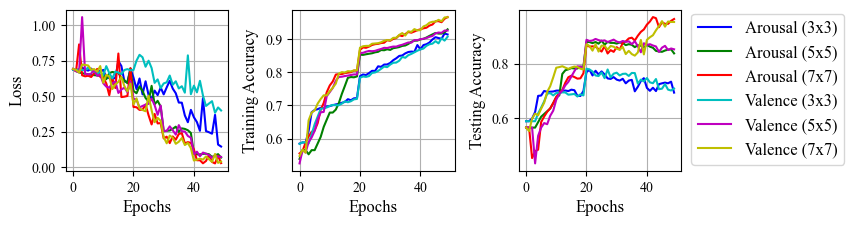

Last test_acc values for each dictionary:
Arousal (3x3): 0.6938747200000002
Arousal (5x5): 0.8378126400000001
Arousal (7x7): 0.96381264
Valence (3x3): 0.7087494400000001
Valence (5x5): 0.8526873600000001
Valence (7x7): 0.9528747200000001
Last test_acc values for each dictionary:
Arousal (3x3): 0.9136411200000001
Arousal (5x5): 0.92910888
Arousal (7x7): 0.96595308
Valence (3x3): 0.90689112
Valence (5x5): 0.9254995200000001
Valence (7x7): 0.96548436


In [52]:
import matplotlib.pyplot as plt

data_dicts = [
    
    PLV_arousal_kernel_3["Fold 8"],
    PLV_Arousal_Kernel_5["Fold 8"],
    PLV_Arousal_Kernel_7["Fold 5"],
    PLV_valence_kernel_3["Fold 3"],
    PLV_valence_kernel_5["Fold 9"],
    PLV_Valence_Kernel_7["Fold 5"]
]

# Legends for the plots
legend_names = [
    "Arousal (3x3)", "Arousal (5x5)", "Arousal (7x7)",
"Valence (3x3)", "Valence (5x5)", "Valence (7x7)"
]

# Define colors for the 6 curves
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Set up figure size (18 cm width, 5 cm height for each subplot)
fig, ax = plt.subplots(1, 3, figsize=(18/2.54, 6/2.54))
fontsize_=12


# Plot Loss vs Epoch
for i, data in enumerate(data_dicts):
    ax[0].plot(data["epochs"], data["loss"], color=colors[i], label=legend_names[i])
ax[0].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[0].set_ylabel("Loss", fontname='Times New Roman', fontsize=fontsize_)
ax[0].grid(True)

# Plot Training Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[1].plot(data["epochs"], data["train_acc"], color=colors[i], label=legend_names[i])
ax[1].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[1].set_ylabel("Training Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[1].grid(True)

# Plot Testing Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[2].plot(data["epochs"], data["test_acc"], color=colors[i], label=legend_names[i])
ax[2].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[2].set_ylabel("Testing Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[2].grid(True)

# Position the legend outside the right side of the plots
fig.legend(legend_names, loc='center right', bbox_to_anchor=(1.2, 0.6), fontsize=fontsize_)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.98, 1])

# Set Times New Roman font for all text in the figure
plt.rc('font', family='Times New Roman')
#plt.savefig('PLV_final_plot.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['test_acc'][-1]}")
    
print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['train_acc'][-1]}")

# Figure 12 (d) XCOR

In [57]:
XCOR_valence_kernel_3 = {
    "Fold 3": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}

Xcor_arousal_kernel_3 = {
   "Fold 3": {
    "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
}
}



Xcor_arousal_kernel_5 = {
    "Fold 2": {
        "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
}




XCOR_valence_kernel_5 = {
    "Fold 7": {
        "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
    }
    }



Xcor_arousal_kernel_7 = {
     "Fold 1": {
       "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49
     }
}
XCOR_valence_kernel_7 = {
    "Fold 9": {
        "loss": [],
        "train_acc": [
            ],
        "test_acc": [
            ],
        "running_time": [
            ],
        "epochs": list(range(50))  # Epochs from 0 to 49 # 0 to 49
    }
}






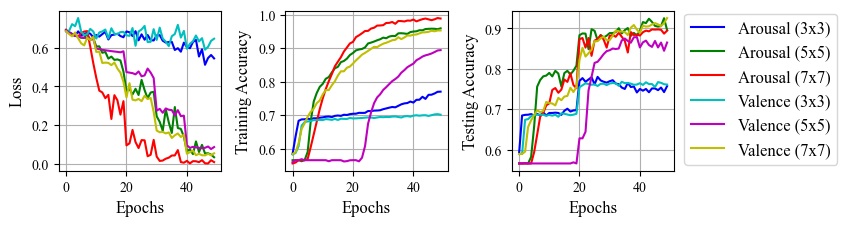

Last test_acc values for each dictionary:
Arousal (3x3): 0.7570544100000002
Arousal (5x5): 0.8958044100000001
Arousal (7x7): 0.8945034900000001
Valence (3x3): 0.7609571700000001
Valence (5x5): 0.8650196700000001
Valence (7x7): 0.92572224
Last test_acc values for each dictionary:
Arousal (3x3): 0.770269
Arousal (5x5): 0.959332
Arousal (7x7): 0.988628
Valence (3x3): 0.701432
Valence (5x5): 0.894314
Valence (7x7): 0.953038


In [56]:
import matplotlib.pyplot as plt

data_dicts = [
    
    Xcor_arousal_kernel_3["Fold 3"],
    Xcor_arousal_kernel_5["Fold 2"],
    Xcor_arousal_kernel_7["Fold 1"],
    XCOR_valence_kernel_3["Fold 3"],
    XCOR_valence_kernel_5["Fold 7"],
    XCOR_valence_kernel_7["Fold 9"]
]

# Legends for the plots
legend_names = [
    "Arousal (3x3)", "Arousal (5x5)", "Arousal (7x7)",
"Valence (3x3)", "Valence (5x5)", "Valence (7x7)"
]

# Define colors for the 6 curves
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Set up figure size (18 cm width, 5 cm height for each subplot)
fig, ax = plt.subplots(1, 3, figsize=(18/2.54, 6/2.54))
fontsize_=12
# Plot Loss vs Epoch
for i, data in enumerate(data_dicts):
    ax[0].plot(data["epochs"], data["loss"], color=colors[i], label=legend_names[i])
ax[0].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[0].set_ylabel("Loss", fontname='Times New Roman', fontsize=fontsize_)
ax[0].grid(True)

# Plot Training Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[1].plot(data["epochs"], data["train_acc"], color=colors[i], label=legend_names[i])
ax[1].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[1].set_ylabel("Training Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[1].grid(True)

# Plot Testing Accuracy vs Epoch
for i, data in enumerate(data_dicts):
    ax[2].plot(data["epochs"], data["test_acc"], color=colors[i], label=legend_names[i])
ax[2].set_xlabel("Epochs", fontname='Times New Roman', fontsize=fontsize_)
ax[2].set_ylabel("Testing Accuracy", fontname='Times New Roman', fontsize=fontsize_)
ax[2].grid(True)

# Position the legend outside the right side of the plots
fig.legend(legend_names, loc='center right', bbox_to_anchor=(1.2, 0.6), fontsize=fontsize_)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.98, 1])

# Set Times New Roman font for all text in the figure
plt.rc('font', family='Times New Roman')
#plt.savefig('XCOR_final_plot.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()



print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['test_acc'][-1]}")
    
print("Last test_acc values for each dictionary:")
for i, data in enumerate(data_dicts):
    print(f"{legend_names[i]}: {data['train_acc'][-1]}")

# Figure 13

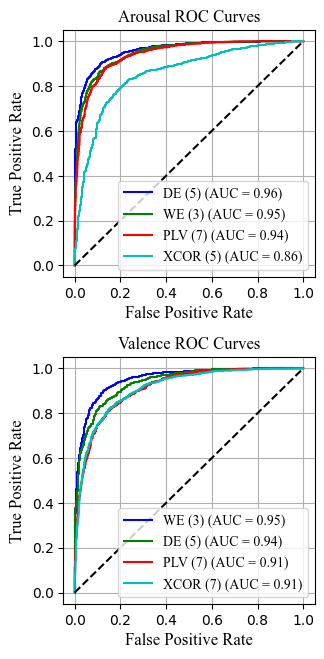

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read FPR and TPR from a file, skipping the header
def read_roc_data(filename):
    fpr, tpr = [], []
    with open(filename, 'r') as file:
        next(file)  # Skip the header line
        for line in file:
            values = line.split()
            if len(values) == 2:
                try:
                    fpr.append(float(values[0]))
                    tpr.append(float(values[1]))
                except ValueError:
                    continue
    return np.array(fpr), np.array(tpr)

# Function to compute AUC using trapezoidal rule
def compute_auc(fpr, tpr):
    return np.trapz(tpr, fpr)

# Files for Arousal and Valence
arousal_files = [
    'roc_curve_Wavelet_Energy_valence_5ker.txt',
    'roc_curve_differential_entropy_valence_3.txt',
    'roc_curve_differential_entropy_Arousal_5.txt',
    'roc_curve_XCOR_valence_3.txt'
    
]

valence_files = [
    
    'roc_curve_Wavelet_Energy_valence_3.txt',
    'roc_curve_Wavelet_Energy_Arousal_3.txt',
    'roc_curve_differential_entropy_Arousal_3.txt',
    'roc_curve_Wavelet_Energy_Arousal_5ker.txt'
]

# Labels for the curves
arousal_labels = [
    'DE (5)', 
    'WE (3)', 
    'PLV (7)', 
    'XCOR (5)'
]

valence_labels = [
    'WE (3)', 
    'DE (5)', 
    'PLV (7)', 
    'XCOR (7)'
]

# Colors for the curves
colors = ['b', 'g', 'r', 'c']

# Set figure size (8.5 cm width, 17 cm height in inches)
fig = plt.figure(figsize=(8.5 / 2.54, 17 / 2.54))

# Subplot 1: Arousal
plt.subplot(2, 1, 1)
for i, file in enumerate(arousal_files):
    fpr, tpr = read_roc_data(file)
    auc = compute_auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{arousal_labels[i]} (AUC = {auc:.2f})", color=colors[i])
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate', fontname='Times New Roman', fontsize=12)
plt.ylabel('True Positive Rate', fontname='Times New Roman', fontsize=12)
plt.title('Arousal ROC Curves', fontname='Times New Roman', fontsize=12)
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 10})
plt.grid(True)

# Subplot 2: Valence
plt.subplot(2, 1, 2)
for i, file in enumerate(valence_files):
    fpr, tpr = read_roc_data(file)
    auc = compute_auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{valence_labels[i]} (AUC = {auc:.2f})", color=colors[i])
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate', fontname='Times New Roman', fontsize=12)
plt.ylabel('True Positive Rate', fontname='Times New Roman', fontsize=12)
plt.title('Valence ROC Curves', fontname='Times New Roman', fontsize=12)
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 10})
plt.grid(True)

# Set Times New Roman for all text elements in the plot
plt.rc('font', family='Times New Roman')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('roc_curves_valence_arousal_with_auc.png', dpi=300)

# Show the plot
plt.show()


# Figure 14

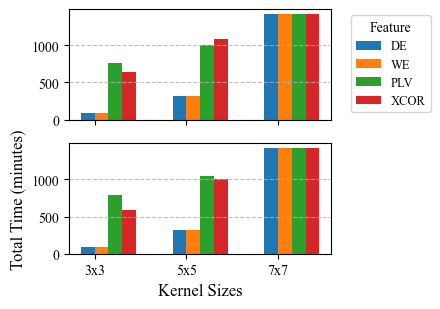

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define features and kernels
features = ["DE", "WE", "PLV", "XCOR"]
kernels = ["3x3", "5x5", "7x7"]

# Training times (seconds per epoch) for each feature and kernel for Arousal and Valence
training_times_arousal = {
    "DE": [11, 38, 170],
    "WE": [11, 38, 170],
    "PLV": [91, 120, 170],
    "XCOR": [77, 130, 170]
}

training_times_valence = {
    "DE": [11, 38, 170],
    "WE": [11, 38, 170],
    "PLV": [95, 125, 170],
    "XCOR": [70, 120, 170]
}

# Total epochs and folds
epochs_per_fold = 50
num_folds = 10

# Calculate total training time in minutes for each kernel and feature
total_time_arousal = {key: [t * epochs_per_fold * num_folds / 60 for t in value] for key, value in training_times_arousal.items()}
total_time_valence = {key: [t * epochs_per_fold * num_folds / 60 for t in value] for key, value in training_times_valence.items()}

# Plot settings
x = np.arange(len(kernels))  # Positions for kernels
bar_width = 0.15  # Width of bars

# Plot for each feature
fig, axs = plt.subplots(2, 1, figsize=(12/2.5, 8/2.5), sharex=True)

for i, (times, title) in enumerate([(total_time_arousal, "Arousal"), (total_time_valence, "Valence")]):
    ax = axs[i]
    for j, feature in enumerate(features):
        # Adjust positions for each feature
        ax.bar(x + (j - 0.5) * bar_width, times[feature], bar_width, label=feature)

   # ax.set_title(f"Total Training Time for {title}", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(kernels, fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.8)

# Set x and y labels
axs[1].set_xlabel("Kernel Sizes", fontsize=12)
axs[1].set_ylabel("Total Time (minutes)", fontsize=12)

# Add legend to the first plot only
axs[0].legend(title="Feature", fontsize=9, loc="upper left", bbox_to_anchor=(1.05, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust to make space for legend

# Show plot
#plt.savefig("Traing Time Performance.png")
plt.show()
